# We Rate Dogs Data Wrangling & Visualization

<ul>
<li><a href="#load">Load Libraries</a></li>
<li><a href="#gather">Gather the Data</a>
    <ul>
        <li><a href="#archive-g">Twitter Archive</a></li>
        <li><a href="#predictions-g">Image Predictions</a></li>
        <li><a href="#api-g">API Data</a></li>
    </ul>
<li><a href="#assess">Assess the Data</a>
    <ul>
        <li><a href="#archive-a">`archive` table</a></li>
        <li><a href="#predictions-a">`predictions` table</a></li>
        <li><a href="#api-a">`api_data` table</a></li>
        <li><a href="#inclusion">Data Inclusion Criteria</a></li>
        <li><a href="#findings">Findings</a></li>
    </ul>
<li><a href="#clean">Clean the Data</a></li>
<li><a href="#analysis">Analysis & Visualization</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='load'></a>
## Load Libraries

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import tweepy
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline

<a id='gather'></a>
## Gather the Data

We will obtain data from three sources, a manually downloaded csv file, a programmatically downloaded tsv file and data scraped from the Twitter API.

<a id='archive-g'></a>
### Twitter Archive

In [2]:
archive = pd.read_csv('twitter_archive_enhanced.csv')

<a id='predictions-g'></a>
### Image Predictions

In [52]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [54]:
# Get data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [56]:
# Create file
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [3]:
predictions = pd.read_csv('image_predictions/image_predictions.tsv', sep='\t')

<a id='api-g'></a>
### API Data

In [4]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
# Get tweet info
tweet = api.get_status(archive.tweet_id[2000], tweet_mode='extended')

In [6]:
# Get json info
info = tweet._json
info

{'created_at': 'Thu Dec 03 18:52:12 +0000 2015',
 'id': 672488522314567680,
 'id_str': '672488522314567680',
 'full_text': 'This is Jackie. She was all ready to go out, but her friends just cancelled on her. 10/10 hang in there Jackie https://t.co/rVfi6CCidK',
 'truncated': False,
 'display_text_range': [0, 134],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 672488519928037376,
    'id_str': '672488519928037376',
    'indices': [111, 134],
    'media_url': 'http://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg',
    'url': 'https://t.co/rVfi6CCidK',
    'display_url': 'pic.twitter.com/rVfi6CCidK',
    'expanded_url': 'https://twitter.com/dog_rates/status/672488522314567680/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 304, 'h': 411, 'resize': 'fit'},
     'small': {'w': 304, 'h': 411, 'resize': 'f

In [88]:
info['retweet_count']

460

In [89]:
info['favorite_count']

1151

In [86]:
info['user']['followers_count']

6982890

In [19]:
print(datetime.datetime.now().time())

10:38:26.842978


In [7]:
# Make file if it doesn't already exist
file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    open(file_name, 'w').close()

In [5]:
tweet_ids = archive.tweet_id

In [25]:
tweet_errors = {}
tweet_count = 1
data = []
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        #print(info) # debug test
        #break # debug test
        # Append to file
        data.append(info)
        with open(file_name, 'w') as file:
            json.dump(data, file)
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count - 1) + "_" + str(tweet_id)] = info

1
14:35:25.741490
2
14:35:25.878125
3
14:35:26.023736
4
14:35:26.170343
5
14:35:26.311471
6
14:35:26.463066
7
14:35:26.607679
8
14:35:26.748807
9
14:35:26.892929
10
14:35:27.035053
11
14:35:27.183657
12
14:35:27.327272
13
14:35:27.486846
14
14:35:27.631459
15
14:35:27.771591
16
14:35:27.910220
17
14:35:28.056828
18
14:35:28.201442
19
14:35:28.346068
20
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
20
14:35:28.609364
21
14:35:28.750986
22
14:35:28.904575
23
14:35:29.077114
24
14:35:29.246661
25
14:35:29.398255
26
14:35:29.576779
27
14:35:29.730871
28
14:35:29.888954
29
14:35:30.053514
30
14:35:30.220069
31
14:35:30.377648
32
14:35:30.543206
33
14:35:30.712752
34
14:35:30.868336
35
14:35:31.023920
36
14:35:31.186992
37
14:35:31.350061
38
14:35:31.521602
39
14:35:31.698130
40
14:35:31.850722
41
14:35:31.999326
42
14:35:32.157901
43
14:35:32.308499
44
14:35:32.474560
45
14:35:32.644611
46
14:35:32.813175
47
14:35:32.967762
48
14:35:33.118359
49
14:35:33.28

14:37:00.536354
380
14:37:00.894398
381
14:37:01.254435
382
14:37:01.586065
383
14:37:01.913695
384
14:37:02.269743
385
14:37:02.603850
386
14:37:02.958911
387
14:37:03.327432
388
14:37:03.688467
389
14:37:04.111352
390
14:37:04.475882
391
14:37:04.859865
392
14:37:05.214916
393
14:37:05.577452
394
14:37:05.946465
395
14:37:06.308019
396
14:37:06.666062
397
14:37:07.046046
398
14:37:07.408582
399
14:37:07.756168
400
14:37:08.109225
401
14:37:08.477241
402
14:37:08.841268
403
14:37:09.202808
404
14:37:09.571339
405
14:37:09.935366
406
14:37:10.319843
407
14:37:10.668910
408
14:37:11.029958
409
14:37:11.391990
410
14:37:11.744049
411
14:37:12.115562
412
14:37:12.506527
413
14:37:12.862575
414
14:37:13.218130
415
14:37:13.574188
416
14:37:13.953175
417
14:37:14.345631
418
14:37:14.705682
419
14:37:15.068712
420
14:37:15.440727
421
14:37:15.799767
422
14:37:16.151343
423
14:37:16.507391
424
14:37:16.882389
425
14:37:17.244924
426
14:37:17.614945
427
14:37:18.048799
428
14:37:18.419807
429


14:40:08.102858
782
14:40:08.672336
783
14:40:09.245310
784
14:40:09.820793
785
14:40:10.373336
786
14:40:10.953785
787
14:40:11.510801
788
14:40:12.104736
789
14:40:12.667747
790
14:40:13.236227
791
14:40:13.822175
792
14:40:14.429552
793
14:40:15.018986
794
14:40:15.597452
795
14:40:16.172914
796
14:40:16.755871
797
14:40:17.330852
798
14:40:17.895343
799
14:40:18.476296
800
14:40:19.067235
801
14:40:19.657667
802
14:40:20.285013
803
14:40:20.867456
804
14:40:21.456388
805
14:40:22.049814
806
14:40:22.622284
807
14:40:23.220190
808
14:40:23.814107
809
14:40:24.379596
810
14:40:24.965031
811
14:40:25.550980
812
14:40:26.169342
813
14:40:26.771245
814
14:40:27.367650
815
14:40:27.995477
816
14:40:28.597876
817
14:40:29.188298
818
14:40:29.839567
819
14:40:30.455942
820
14:40:31.081788
821
14:40:31.721079
822
14:40:32.296057
823
14:40:32.897450
824
14:40:33.468931
825
14:40:34.047910
826
14:40:34.660272
827
14:40:35.248215
828
14:40:35.827172
829
14:40:36.407621
830
14:40:37.005035
831


14:44:41.202290
1183
14:44:41.966763
1184
14:44:42.714764
1185
14:44:43.529102
1186
14:44:44.283601
1187
14:44:45.072011
1188
14:44:45.840974
1189
14:44:46.591986
1190
14:44:47.358453
1191
14:44:48.121929
1192
14:44:48.875913
1193
14:44:49.671810
1194
14:44:50.459703
1195
14:44:51.243684
1196
14:44:52.054516
1197
14:44:52.820983
1198
14:44:53.586459
1199
14:44:54.379846
1200
14:44:55.167763
1201
14:44:55.931240
1202
14:44:56.753054
1203
14:44:57.510545
1204
14:44:58.291470
1205
14:44:59.102303
1206
14:44:59.932096
1207
14:45:00.693575
1208
14:45:01.494459
1209
14:45:02.252949
1210
14:45:03.022891
1211
14:45:03.791352
1212
14:45:04.554825
1213
14:45:05.345235
1214
14:45:06.111207
1215
14:45:06.904592
1216
14:45:07.694481
1217
14:45:08.501838
1218
14:45:09.260315
1219
14:45:10.037262
1220
14:45:10.828650
1221
14:45:11.662946
1222
14:45:12.443859
1223
14:45:13.240234
1224
14:45:14.022144
1225
14:45:14.828000
1226
14:45:15.595464
1227
14:45:16.383359
1228
14:45:17.194210
1229
14:45:17.9606

Rate limit reached. Sleeping for: 248


14:49:40.540325
1535
14:53:54.487509
1536
14:53:55.409562
1537
14:53:56.340075
1538
14:53:57.260637
1539
14:53:58.168224
1540
14:53:59.100731
1541
14:54:00.020778
1542
14:54:00.957285
1543
14:54:01.889815
1544
14:54:02.804872
1545
14:54:03.724939
1546
14:54:04.671409
1547
14:54:05.602440
1548
14:54:06.506045
1549
14:54:07.453031
1550
14:54:08.385055
1551
14:54:09.349007
1552
14:54:10.306448
1553
14:54:11.275868
1554
14:54:12.244290
1555
14:54:13.172828
1556
14:54:14.102858
1557
14:54:15.042347
1558
14:54:16.045675
1559
14:54:17.036039
1560
14:54:18.018426
1561
14:54:19.081598
1562
14:54:20.029581
1563
14:54:21.019933
1564
14:54:21.986881
1565
14:54:23.001674
1566
14:54:23.957633
1567
14:54:24.965444
1568
14:54:25.958803
1569
14:54:27.170084
1570
14:54:28.096618
1571
14:54:29.043591
1572
14:54:30.019006
1573
14:54:31.065730
1574
14:54:31.993259
1575
14:54:32.958700
1576
14:54:33.874253
1577
14:54:34.794813
1578
14:54:35.795139
1579
14:54:36.803466
1580
14:54:37.876612
1581
14:54:38.8056

15:00:36.041872
1926
15:00:37.141447
1927
15:00:38.224068
1928
15:00:39.319172
1929
15:00:40.421283
1930
15:00:41.521856
1931
15:00:42.588017
1932
15:00:43.701559
1933
15:00:44.791174
1934
15:00:45.874279
1935
15:00:46.995294
1936
15:00:48.095373
1937
15:00:49.217374
1938
15:00:50.286516
1939
15:00:51.434477
1940
15:00:52.538557
1941
15:00:53.621167
1942
15:00:54.696828
1943
15:00:55.788974
1944
15:00:56.882052
1945
15:00:57.969660
1946
15:00:59.065729
1947
15:01:00.178287
1948
15:01:01.292823
1949
15:01:02.487146
1950
15:01:03.560792
1951
15:01:04.634921
1952
15:01:05.741479
1953
15:01:06.844542
1954
15:01:07.925675
1955
15:01:09.048693
1956
15:01:10.163235
1957
15:01:11.284272
1958
15:01:12.380860
1959
15:01:13.498882
1960
15:01:14.607435
1961
15:01:15.701535
1962
15:01:16.826536
1963
15:01:17.928121
1964
15:01:19.053156
1965
15:01:20.149696
1966
15:01:21.309595
1967
15:01:22.461033
1968
15:01:23.571581
1969
15:01:24.705075
1970
15:01:25.848040
1971
15:01:26.974533
1972
15:01:28.0666

15:08:22.669458
2317
15:08:23.942056
2318
15:08:25.199212
2319
15:08:26.556605
2320
15:08:27.909503
2321
15:08:29.152192
2322
15:08:30.406365
2323
15:08:31.699414
2324
15:08:32.996476
2325
15:08:34.241189
2326
15:08:35.494344
2327
15:08:36.866700
2328
15:08:38.117365
2329
15:08:39.367034
2330
15:08:40.654618
2331
15:08:42.009010
2332
15:08:43.362406
2333
15:08:44.613578
2334
15:08:45.889181
2335
15:08:47.242100
2336
15:08:48.493754
2337
15:08:49.735467
2338
15:08:51.015046
2339
15:08:52.300127
2340
15:08:53.583695
2341
15:08:54.852318
2342
15:08:56.170793
2343
15:08:57.514215
2344
15:08:58.847182
2345
15:09:00.147223


In [ ]:
data = {}
data['tweets'] = []
tweet_errors = {}
tweet_count = 1
for tweet_id in tweet_ids:
    try:
        # Print id counter
        print(tweet_count)
        # Collect tweet info
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        info = tweet._json
        # Collect specific data
        retweet_count = info['retweet_count']
        favorite_count = info['favorite_count']
        followers_count = info['user']['followers_count']
        # Append to data dict
        data['tweets'].append({
            'tweet_id': tweet_id, 
            'retweet_count': retweet_count, 
            'favorite_count': favorite_count,
            'followers_count': followers_count
        })
        #print(retweet_count, favorite_count, followers_count) # debug test
        #print(data)
        #break # debug test
        # Print timer info to estimate time until wake-up
        print(datetime.datetime.now().time())
        # Add one to the tweet count for further printing
        tweet_count += 1
        
    except Exception as e:
        # Print exception info and add to tweet_errors dict
        print(str(tweet_count) + "_" + str(tweet_id) + ": " + str(e))
        tweet_errors[str(tweet_count) + "_" + str(tweet_id)] = info

In [5]:
# Extract data from file
df_list = []
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweet in data:
        df_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count'],
                        'followers_count': tweet['user']['followers_count']})

In [6]:
# Create DataFrame from list of dictionaries
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 
                                            'retweet_count', 
                                            'favorite_count', 
                                            'followers_count'])

In [32]:
tweet_errors.keys()

dict_keys(['19_888202515573088257', '94_873697596434513921', '116_869988702071779329', '129_866816280283807744', '151_861769973181624320', '242_845459076796616705', '254_842892208864923648', '291_837012587749474308', '374_827228250799742977', '557_802247111496568832', '774_775096608509886464'])

Resources:
- [Create file if it doesn't exist](https://stackoverflow.com/questions/35807605/create-a-file-if-it-doesnt-exist?lq=1)
- [Appending data to json file](https://stackoverflow.com/questions/12994442/appending-data-to-a-json-file-in-python)
- [Create an empty file](https://stackoverflow.com/questions/12654772/create-empty-file-using-python)

<a id='assess'></a>
## Assess the Data

<a id='archive-a'></a>
### `archive` table

In [68]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [69]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# Count number of not 'None' values in columns 'doggo' to 'puppo'
(archive.loc[:,'doggo':'puppo'] != 'None').sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [31]:
# Count number of cells of `text` with doggo, floofer, pupper, and puppo
for column in archive.columns[-4:]:
    print(column, archive.text.str.contains(column).sum())

doggo 98
floofer 4
pupper 272
puppo 37


In [38]:
# Check if name is always captured
archive[['text', 'name']].sample(10)

,text,name
1128,This is Stefan. He's a downright remarkable pu...,Stefan
2172,Just got home from college. Dis my dog. She do...,None
935,This is Scout. Her batteries are low. 12/10 pr...,Scout
518,This is Pavlov. His floatation device has fail...,Pavlov
1132,"When you're way too slow for the ""down low"" po...",None
1891,These two pups are masters of camouflage. Very...,None
684,Atlas is back and this time he's got doggles. ...,None
2269,This a Norwegian Pewterschmidt named Tickles. ...,None
1583,Army of water dogs here. None of them know whe...,None
904,This is Corey. He's a Portobello Corgicool. Tr...,Corey


In [39]:
# Identify example of missing name
archive.text[2269]

'This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7'

In [19]:
# Identify example of two names
archive.text[2232]

These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals https://t.co/4pw1QQ6udh


In [79]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
an             7
Toby           7
Daisy          7
Bailey         7
Buddy          7
Jax            6
Scout          6
Bella          6
Oscar          6
Jack           6
Rusty          6
Stanley        6
Milo           6
Leo            6
Dave           6
Koda           6
Gus            5
            ... 
Taco           1
Bert           1
Alexander      1
Rorie          1
Shikha         1
Snoop          1
old            1
Deacon         1
Grady          1
Yoda           1
Duchess        1
Ivar           1
Kathmandu      1
Sid            1
Dobby          1
Brudge         1
Sandra         1
Genevieve      1
Lillie         1
Dewey          1
Tedrick        1
Leonard        1
Bobby          1
Mookie         1
O              1
Rooney         1
Dook           1
Rinna         

In [120]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [121]:
archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

<a id='predictions-a'></a>
### `predictions` table

In [58]:
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Does this not give us all the images we want? Can I not just use these id's to subset `archive`?

In [59]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<a id='api-a'></a>
### `api_data` table

In [31]:
api_data

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8559,38695,6989325
1,892177421306343426,6293,33168,6989325
2,891815181378084864,4176,24966,6989325
3,891689557279858688,8683,42080,6989325
4,891327558926688256,9451,40228,6989325
5,891087950875897856,3127,20175,6989325
6,890971913173991426,2082,11820,6989325
7,890729181411237888,18984,65374,6989325
8,890609185150312448,4281,27728,6989325
9,890240255349198849,7453,31873,6989325


In [33]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
tweet_id           2345 non-null int64
retweet_count      2345 non-null int64
favorite_count     2345 non-null int64
followers_count    2345 non-null int64
dtypes: int64(4)
memory usage: 73.4 KB


<a id='inclusion'></a>
### Data Inclusion Criteria

We are expected to use the following criteria to select the required data:
- Do not include retweets
- Only tweets that have images

An additional comment was made in student discussions: _The archive also has reply tweets which in general contain upgraded/downgraded ratings of the dog. This means that in some cases there are two observations/ratings for the same dog_. As a result, I decided to only include original ratings and so developed an additional criteria:

- Do not include replies

<a id='findings'></a>
### Findings

#### Quality

##### `archive` table
- Retweets are included in the dataset
- Replies are included in the dataset
- Erroneous datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo columns)
- Missing info in `expanded_urls`
- Nulls represented as "None" (str) for `name`, `doggo`, `floofer`, `pupper`, and `puppo` columns
- Missing counts for `doggo`, `floofer`, `pupper` and `puppo`
- Missing names identified from `text` in `name` e.g. index 1852 - Reggie
- Some names identified are not names
- `text` column includes both text and short version of link
- Second name missing if two are mentioned, e.g. index 2232 - Bo & Smittens
- Some extracted values for `rating_numerator` and `rating_denominator` seem to be in error

##### `predictions` table
- Erroneous datatype (tweet_id)
- The lower number of entries means that some posts don't have images

##### `api_data` table
- Erroneous datatype (tweet_id)
- Retweet and favorite information is not available for all tweets and cannot be retrieved

#### Tidiness

##### `archive` table
- There are multiple columns containing the same type of data, e.g. `doggo`, `floofer`, `pupper` and `puppo` all contain dog types

##### `predictions` table
- There are multiple columns containing the same type of data, e.g. `p1`, `p2`, `p3` all contain dog breed predictions

##### `api_data` table
- This data is separate from the other tweet data

<a id='clean'></a>
## Clean the Data

In [7]:
# Make copies to preserve the original datasets
archive_clean = archive.copy()
predictions_clean = predictions.copy()
api_data_clean = api_data.copy()

### Missing Data

There are four areas of missing data identified:

1. Missing info in `expanded_urls`
2. Missing counts for `doggo`, `floofer`, `pupper` and `puppo`
3. Missing names identified from `text` in `name` e.g. index 1852 - Reggie
4. Second name missing if two are mentioned, e.g. index 2232 - Bo & Smittens

I am not concerned about tracking down the missing url information because I don't plan to analyze it. 

#### Missing counts for `doggo`, `floofer`, `pupper` and `puppo` in `archive` table
The issue of _Nulls represented as "None" (str) for `doggo`, `floofer`, `pupper`, and `puppo` columns_ is also able to be addressed here.

##### Define
Use `for` loop and `.str.contains()` to re-identify if `text` contains each column header. Include text if it is found. If not, return NaN.

##### Code

In [8]:
dog_types = list(archive_clean.iloc[:,-4:])
dog_types

['doggo', 'floofer', 'pupper', 'puppo']

In [9]:
def find_dog_type(df, dog_type):
    dog_list = []
    for row in df['text']:
        if dog_type in row:
            dog_list.append(dog_type)
        else:
            dog_list.append(np.NaN)
    return dog_list

In [10]:
for dog_type in dog_types:
    archive_clean[dog_type] = find_dog_type(archive, dog_type)

Resources: 
- [Create A pandas Column With A For Loop](https://chrisalbon.com/python/data_wrangling/pandas_create_column_with_loop/)
- [Find substring](https://stackoverflow.com/questions/3437059/does-python-have-a-string-contains-substring-method)

##### Test

In [78]:
# Check non-null data counts for columns
archive_clean[dog_types].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 4 columns):
doggo      98 non-null object
floofer    4 non-null object
pupper     272 non-null object
puppo      37 non-null object
dtypes: object(4)
memory usage: 73.7+ KB


In [45]:
# Compare to counts from text
for dog_type in dog_types:
    print(dog_type, archive_clean.text.str.contains(dog_type).sum())

doggo 98
floofer 4
pupper 272
puppo 37


The counts of what is found in the `text` strings matches what is found in the columns.

#### Missing names identified from `text` in `name` in `archive` table
The issues of _Some names identified are not names_ and _Nulls represented as "None" (str) for name_ can also be addressed here. 

This would also be the place to address _Second name missing if two are mentioned_ however I decided that this was too difficult for me to do.

##### Define
Create function to identify pet names and re-populate `name` column

###### Code

Pet names are capitalized, usually less than 10 characters but at least 2, and typically found before the first period. They typically only include letters and apostrophes and certain words are not usually used as pet names.

In [11]:
def find_names(df):
    name_list = []
    for row in df['text']:
        # Find first "."
        first_period = row.find(".")
        # If no period is found, assume there is no name
        if first_period == -1:
            name_list.append(np.NaN)
        else:
            # Find word before period
            word_before = row[:first_period].rsplit(' ', 1)[-1]
            # Check if word is capitalized
            if word_before == word_before.title():
                # Add exclusionary criteria - not more than 10 letters, not less than 2 letters, not in other_words, only alphanumeric
                other_words = ["This", "Xbox", "Oh", "Christmas", "Up", "Pupper", "Doggo", "Puppo", "Floofer"]
                if (len(word_before) > 10) or any(word in word_before for word in other_words) or any(c for c in word_before if c not in string.ascii_letters + "'") or (len(word_before) < 2):
                    name_list.append(np.NaN)
                else:
                    name_list.append(word_before)
            else:
                name_list.append(np.NaN)
        
    return name_list

In [12]:
name_list = find_names(archive_clean)
archive_clean.name = name_list

Resources:
- [Find string before](https://www.dotnetperls.com/between-before-after-python)
- [Split string by value](https://stackoverflow.com/questions/7253803/how-to-get-everything-after-last-slash-in-a-url)
- [Check if list element in string](https://stackoverflow.com/questions/6531482/how-to-check-if-a-string-contains-an-element-from-a-list-in-python)
- [Check for only alpha and apostrophe](https://stackoverflow.com/questions/33790790/how-to-check-if-a-string-contains-letters-or-letters-and-an-apostrophe-but-no-nu)
- [Check for whitespace](https://stackoverflow.com/questions/2405292/how-to-check-if-text-is-empty-spaces-tabs-newlines-in-python)

##### Test

In [101]:
# View names and NaNs
archive_clean.name.head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5         NaN
6         Jax
7         NaN
8        Zoey
9      Cassie
Name: name, dtype: object

In [157]:
# Check value counts for unexpected names
archive_clean.name.value_counts()

Charlie      14
Oliver       12
Cooper       11
Tucker       10
Lola         10
Lucy         10
Winston       9
Penny         9
Daisy         8
Bailey        7
Buddy         7
Bo            7
Toby          6
Scout         6
Sadie         6
Bella         6
Rusty         6
Stanley       6
Leo           6
Dave          6
Milo          6
Koda          6
Loki          5
Louis         5
Sophie        5
Jax           5
Gus           5
Larry         5
Ruby          5
Oscar         5
             ..
Jeffri        1
Lilah         1
Fwed          1
Bert          1
Rorie         1
Rinna         1
Pubert        1
Rooney        1
Kathmandu     1
Pumpkin       1
Darby         1
Apollo        1
Gustav        1
Banjo         1
Jeremy        1
Yoda          1
Duchess       1
Ivar          1
Hemry         1
Mookie        1
Dobby         1
Brudge        1
Sandra        1
Genevieve     1
Grady         1
Lillie        1
Tedrick       1
Leonard       1
Striker       1
Alfy          1
Name: name, Length: 961,

In [135]:
# Visually compare sample of results
archive_clean[['text', 'name']].sample(10)

,text,name
2188,This is Jeremy. He hasn't grown into his skin ...,Jeremy
312,Meet Lola. Her hobbies include being precious ...,Lola
2130,This is Wally. He's a Flaccid Mitochondria. Go...,Wally
971,Meet Lilah. She agreed on one quick pic. Now s...,Lilah
2353,Here is a very happy pup. Big fan of well-main...,NaN
2280,This is Fwed. He is a Canadian Asian Taylormad...,Fwed
942,This is Grizzie. She's a semi-submerged Bahrai...,Grizzie
732,Idk why this keeps happening. We only rate dog...,NaN
2178,Super rare dog right here guys. Doesn't bark. ...,NaN
322,This is Sunshine. She doesn't believe in perso...,Sunshine


### Tidy Data
The next step is to address tidiness issues. Three were identified:
1. There are multiple columns containing the same type of data in the `archive` table, e.g. doggo, floofer, pupper, puppo
2. There are multiple columns containing the same type of data in the `predictions` table, e.g. p1, p2, p3 all contain dog breed predictions
3. The tweet data in the `api_data` table is separate from the other tweet data

#### Multiple columns containing the same type of data in the `archive` table
There is a small amount of overlap, but I would rather the posts be classified once. 

##### Define
Create a column called `dog_type` and merge all data in order of `puppo`, `pupper`, `floofer`, `doggo` using `.fillna()`. Drop the redundant columns.

##### Code

In [13]:
archive_clean['dog_type'] = archive_clean.puppo.fillna(archive_clean.pupper.fillna(archive_clean.floofer.fillna(archive_clean.doggo)))

In [14]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [146]:
# Confirm NaNs remain
archive_clean.dog_type.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dog_type, dtype: object

In [147]:
# Check dog_type counts
archive_clean.dog_type.value_counts()

pupper     272
doggo       86
puppo       37
floofer      4
Name: dog_type, dtype: int64

The original count was:

- doggo 98
- floofer 4
- pupper 272
- puppo 37

So just lost 12 counts from doggo which seems acceptable to me.

In [139]:
# Confirm column drop
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_type'],
      dtype='object')

#### Multiple columns containing the same type of data in the `predictions` table

##### Define
Change columns names for ease of use with `pd.wide_to_long`. Use `pd.wide_to_long` to 
- melt `p1_conf`, `p2_conf`, `p3_conf` to a `confidence` column
- melt `p1`, `p2`, `p3` to a `prediction` column
- melt `p1_dog`, `p2_dog`, `p3_dog` to a `dog` column.

##### Code

In [15]:
# Change column names
col_names = ['tweet_id', 'jpg_url', 'img_num', 
             'prediction_1', 'confidence_1', 'dog_1', 
             'prediction_2', 'confidence_2', 'dog_2', 
             'prediction_3', 'confidence_3', 'dog_3']
predictions_clean.columns = col_names

In [16]:
# Convert wide to long
predictions_clean = pd.wide_to_long(predictions_clean, 
                                    stubnames=['prediction', 'confidence', 'dog'],
                      i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_order', sep='_')\
.reset_index()

##### Test

In [189]:
# Visual inspection
predictions_clean.head(9)

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True


In [190]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
prediction_order    6225 non-null object
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 298.0+ KB


In [191]:
# Compare count to original counts
6225/2075

3.0

Given that there are three predictions for each, it is expected that the length would increase by three times. This is what has occurred.

Resources:
- [Multiple column melt](https://stackoverflow.com/questions/38862832/pandas-melt-several-groups-of-columns-into-multiple-target-columns-by-name)

#### Tweet data in the api_data table is separate from the other tweet data

##### Define
Merge the data from `api_data` with the `archive` table

##### Code

In [17]:
archive_clean = pd.merge(left=archive_clean, right=api_data_clean, how='left', on='tweet_id')

##### Test

In [194]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,followers_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8561.0,38696.0,6984446.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6295.0,33171.0,6984446.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4176.0,24967.0,6984446.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8683.0,42087.0,6984446.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9453.0,40235.0,6984446.0


In [82]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1531 non-null object
dog_type                      399 non-null object
retweet_count                 2345 non-null float64
favorite_count                2345 non-null float64
followers_count               2345 non-null float64
dtypes: float64(7), int64(3), 

### Data Quality

#### Some posts don't have images

##### Define
Remove any tweet ids in the `archive` table that aren't in the `predictions` table.

##### Code

In [18]:
# Confirm the number to be removed
no_image = (~archive_clean.tweet_id.isin(list(predictions_clean.tweet_id)))
no_image.sum()

281

In [19]:
# Remove non-shared tweet_id's
archive_clean = archive_clean[~no_image]

##### Test

In [65]:
# Confirm no tweet_id's without images
(~archive_clean.tweet_id.isin(list(predictions_clean.tweet_id))).sum()

0

In [86]:
# Confirm new archive_clean counts
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          1422 non-null object
dog_type                      338 non-null object
retweet_count                 2069 non-null float64
favorite_count                2069 non-null float64
followers_count               2069 non-null float64
dtypes: float64(7), int64(3), obj

#### Replies and retweets are included in `archive` table

##### Define
- Identify rows that have info for `in_reply_to_status_id` or `retweeted_status_id` and remove from `archive_clean`. 
- Remove redundant columns (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`).
- Remove non-shared id's from `predictions_clean`

##### Code

In [20]:
# Check rows to remove for replies
replies = (~archive_clean.in_reply_to_status_id.isnull())
replies.sum()

23

In [21]:
# Remove replies
archive_clean = archive_clean[~replies]

In [22]:
# Check rows to remove for retweets
retweets = (~archive_clean.retweeted_status_user_id.isnull())
retweets.sum()

81

In [23]:
# Remove retweets
archive_clean = archive_clean[~retweets]

In [24]:
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

In [25]:
# Identify tweet_ids in predictions not in archive
not_shared = (~predictions_clean.tweet_id.isin(list(archive_clean.tweet_id)))
not_shared.sum()

312

This makes sense because it is 3 times 104 (the number of rows that were removed from `archive_clean`).

In [26]:
predictions_clean = predictions_clean[~not_shared]

##### Test

In [95]:
# Confirm new archive_clean counts
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1367 non-null object
dog_type              322 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
followers_count       1971 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 200.2+ KB


Note: removing all of the replies and retweets also removed all rows that didnt' have the `api_data` information. 

In [83]:
2075 - (23 + 81)

1971

The expected number of rows were removed and the columns were removed.

In [98]:
# Confirm no unshared prection_clean tweet_id's with archive_clean
(~predictions_clean.tweet_id.isin(list(archive_clean.tweet_id))).sum()

0

#### `text` column in `archive` contains both text and short link

##### Define
Create a function to remove links and apply it to `achive_clean.text`.

##### Code

In [27]:
def remove_link(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x

In [28]:
archive_clean.text = archive_clean.text.apply(remove_link)

##### Test

In [118]:
# Print full text to check endings
for row in archive_clean.text[:5]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek


#### Values for rating_numerator are incorrect

##### Define
Create a function that identifies the value before the last `/` in the text and uses this in the `rating_numerator` column. Manually correct any ratings that are not covered by the function.

##### Code

In [42]:
def find_numerator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Most ratings are two digits, but if not, preceded by " ", "()" or "..."
    # Check for decimal
    try:
        if x[slash - 2] == ".":
            numerator = x[slash - 4:slash].strip()
            if numerator[0] == ".":
                numerator = numerator.strip("...").strip("..")
        else:
            numerator = x[slash - 2:slash].strip().strip("(")
        return float(numerator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [43]:
archive_clean.rating_numerator = archive_clean.text.apply(find_numerator)

In [44]:
# Identify strange formatting
missing_numerator = list(archive_clean[archive_clean.rating_numerator.isnull()].index)
missing_numerator

[2216, 2246]

In [42]:
# Check full text for each
for index in missing_numerator:
    print(index, archive_clean.text[index])

2216 This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10
2246 This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10


One contains two ratings and one is a humerous expression related to the picture. I'm going to go with 8 and 10

In [45]:
archive_clean.at[missing_numerator[0], 'rating_numerator'] = 8
archive_clean.at[missing_numerator[1], 'rating_numerator'] = 10

##### Test

In [46]:
# Check all values are filled
archive_clean.rating_numerator.isnull().sum()

0

In [85]:
# Check range of values
archive_clean.rating_numerator.describe()

count    1971.000000
mean       10.893709
std         5.103397
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

Values seem more inline with expectations (most over 10 but not many 15 and over)

#### Values for rating_denominator are incorrect

##### Define
Create a function that identifies the value after the last / in the text and uses this in the `rating_denominator` column.

##### Code

In [48]:
def find_denominator(x):
    # Ratings are associated with the last "/"
    slash = x.rfind("/")
    # Don't need to check for missing because original set only includes tweets with ratings
    # Expect denominator to be two digits
    try:
        denominator = x[slash + 1:slash + 3]
        return float(denominator)
    # Manage strange formatting
    except ValueError:
        return np.NaN

In [49]:
archive_clean.rating_denominator = archive_clean.text.apply(find_denominator)

##### Test

In [86]:
# Check all values are filled
archive_clean.rating_denominator.isnull().sum()

0

In [87]:
# Check range of values
archive_clean.rating_denominator.describe()

count    1971.000000
mean       10.203957
std         3.483537
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        90.000000
Name: rating_denominator, dtype: float64

Most denominators are expected to be 10.

#### Erroneous datatypes
- By melting the `predictions` table, an additional erroneous data type was created in the `prediction_order` column. 
- With the collapse of the columns in `archive` table to a single `dog_type` column, an additional erroneous data type was created in the column. 

##### Define
`archive_clean` table:
- *tweet_id:* change to str
- *timestamp:* change to datetime
- *dog_type:* categorical

`predictions_clean` table:
- *tweet_id:* change to str
- *prediction_order:* changet to categorical

##### Code

In [50]:
# Change tweet_id's
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [51]:
# Change timestamp
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

In [52]:
# Change dog_type and prediction order
archive_clean.dog_type = archive_clean.dog_type.astype("category")
predictions_clean.prediction_order = predictions_clean.prediction_order.astype("category")

##### Test

In [116]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null category
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
followers_count       1971 non-null float64
dtypes: category(1), datetime64[ns](1), float64(5), object(5)
memory usage: 266.9+ KB


In [117]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            5913 non-null object
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null category
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), category(1), float64(1), int64(1), object(3)
memory usage: 288.8+ KB


### Save Cleaned Data

In [118]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)
predictions_clean.to_csv('predictions_master.csv', index=False)

<a id='analysis'></a>
## Analyze and Visualize

In [54]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [55]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null object
retweet_count         1971 non-null float64
favorite_count        1971 non-null float64
followers_count       1971 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 184.9+ KB


In [56]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


All of the types have been lost with the conversion to and from csv so I need to re-run those.

In [57]:
# Change types
archive.tweet_id = archive.tweet_id.astype(str)
predictions.tweet_id = predictions.tweet_id.astype(str)
archive.dog_type = archive.dog_type.astype("category")
predictions.prediction_order = predictions.prediction_order.astype("category")
archive.timestamp = pd.to_datetime(archive.timestamp)

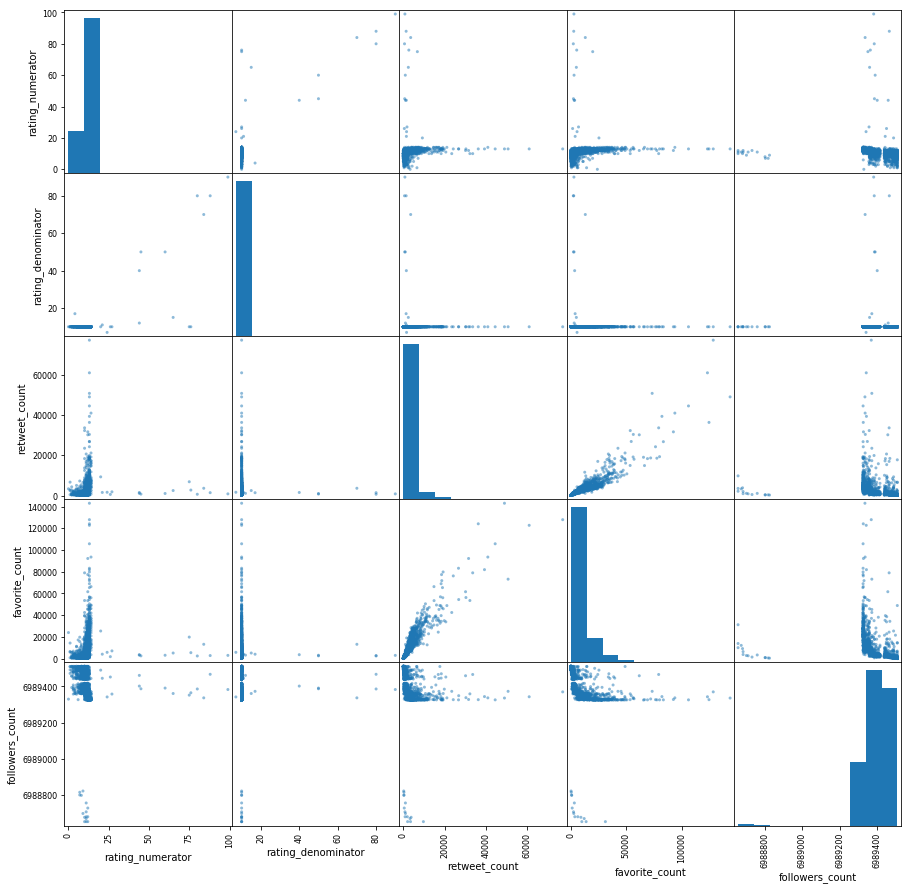

In [125]:
pd.plotting.scatter_matrix(archive.iloc[:, 1:], figsize=(15, 15));

### Retweet Counts

In [58]:
archive.retweet_count.describe()

count     1971.000000
mean      2725.781329
std       4699.394366
min         13.000000
25%        608.500000
50%       1323.000000
75%       3127.500000
max      77141.000000
Name: retweet_count, dtype: float64

In [59]:
def set_my_palette():
    sns.set()
    current_palette = sns.color_palette(my_palette)
    sns.set_palette(current_palette)

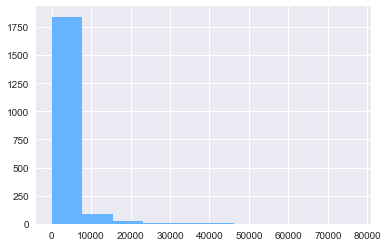

In [60]:
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
set_my_palette()
archive.retweet_count.hist();

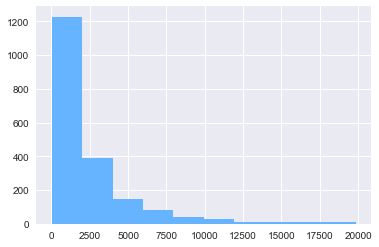

In [61]:
archive[archive.retweet_count <= 20000].retweet_count.hist();

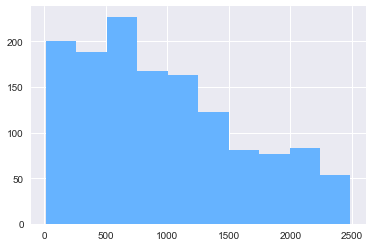

In [62]:
archive[archive.retweet_count <= 2500].retweet_count.hist();

### Favorites Count

In [63]:
archive.favorite_count.describe()

count      1971.000000
mean       8880.210046
std       12590.668395
min          80.000000
25%        1938.500000
50%        4040.000000
75%       11164.500000
max      143023.000000
Name: favorite_count, dtype: float64

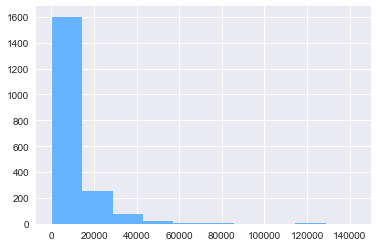

In [64]:
archive.favorite_count.hist();

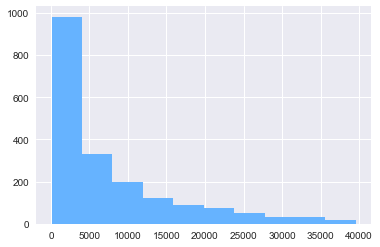

In [65]:
archive[archive.favorite_count <= 40000].favorite_count.hist();

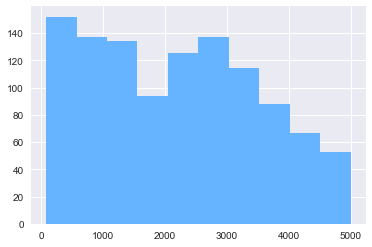

In [66]:
archive[archive.favorite_count <= 5000].favorite_count.hist();

### Most Popular Names

In [67]:
archive.name.value_counts().head(10)

Charlie    13
Oliver     11
Cooper     10
Lucy        9
Tucker      9
Daisy       8
Penny       8
Winston     8
Lola        7
Stanley     6
Name: name, dtype: int64

### Over Time

#### Followers

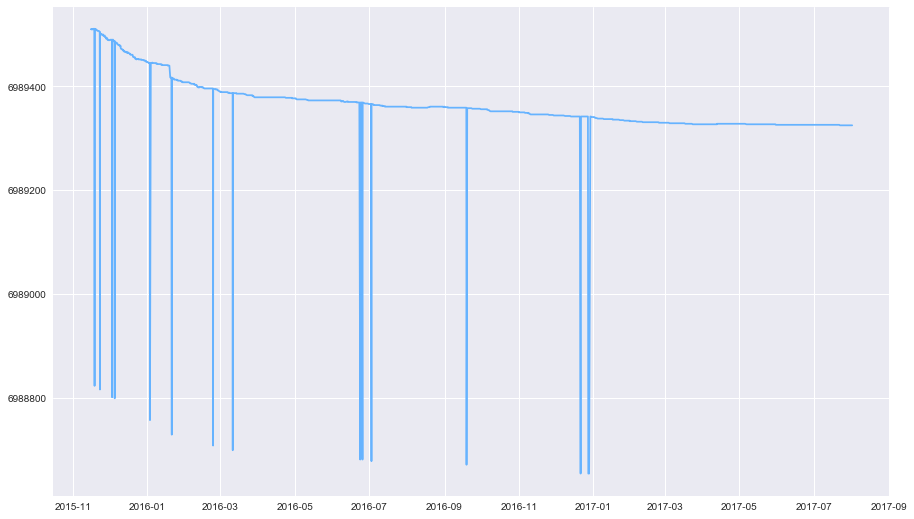

In [68]:
plt.subplots(figsize=(15, 9))
plt.plot(archive.timestamp, archive.followers_count);

In [69]:
archive.followers_count.describe()

count    1.971000e+03
mean     6.989401e+06
std      8.672666e+01
min      6.988654e+06
25%      6.989352e+06
50%      6.989386e+06
75%      6.989467e+06
max      6.989511e+06
Name: followers_count, dtype: float64

There are these strange spikes that don't seem to make sense. Can probably subset to just remove them as they correct back to the original values. Want to keep above 6989200.

In [70]:
follower_count = archive.query('followers_count > 6989200')

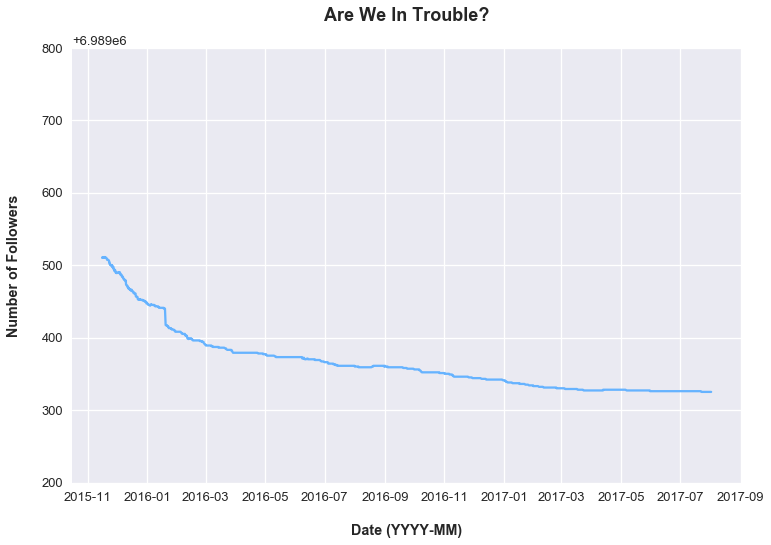

In [71]:
sns.set_context("talk")
plt.subplots(figsize=(12, 8))
plt.plot(follower_count.timestamp, follower_count.followers_count)
plt.ylim(6989200, 6989800)
plt.title('Are We In Trouble?\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Number of Followers\n', weight='bold');
plt.savefig('in-trouble.png')

#### Retweets

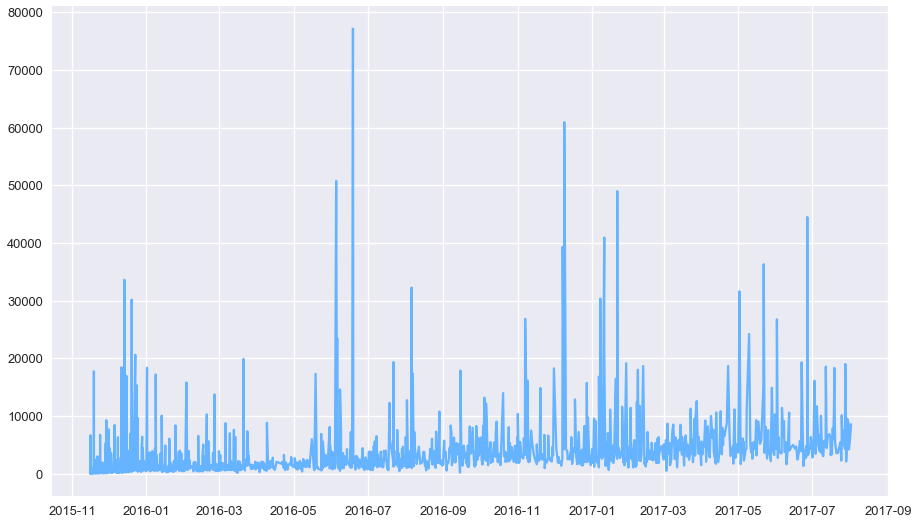

In [72]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(archive.timestamp, archive.retweet_count);

In [73]:
weekly_retweet = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]

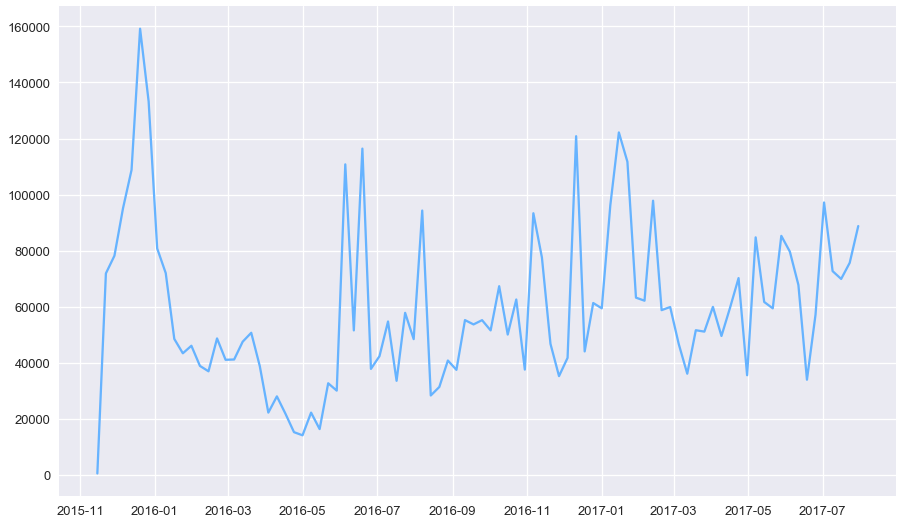

In [74]:
plt.subplots(figsize=(15, 9))
plt.plot(weekly_retweet.timestamp, weekly_retweet.retweet_count);

Resources:
- [Group by Dates](https://stackoverflow.com/questions/45281297/group-by-week-in-pandas)

#### Favorites

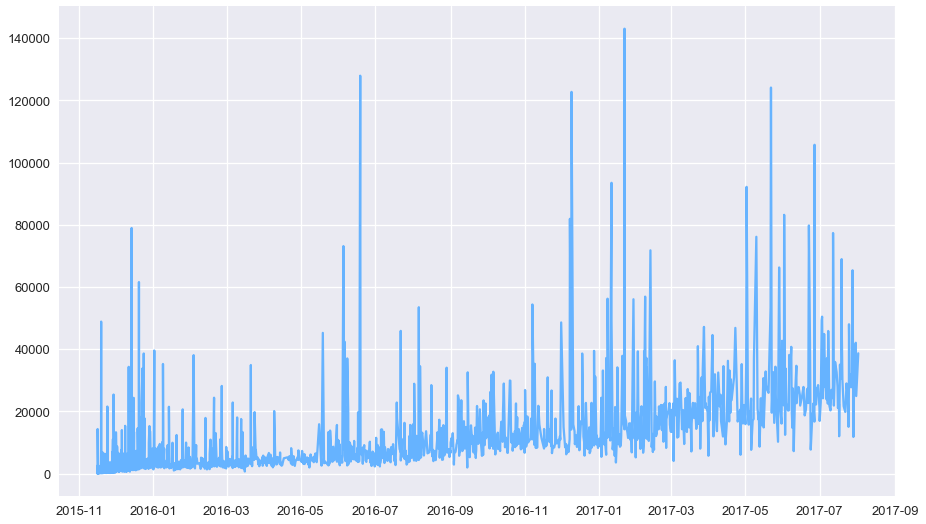

In [75]:
plt.subplots(figsize=(15, 9))
plt.plot(archive.timestamp, archive.favorite_count);

In [76]:
weekly_favorite = archive.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorite_count'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]

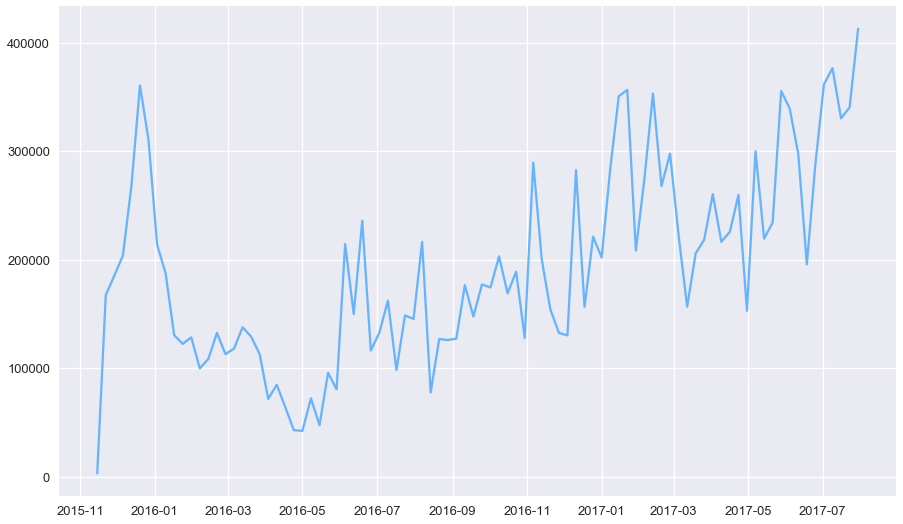

In [77]:
plt.subplots(figsize=(15, 9))
plt.plot(weekly_favorite.timestamp, weekly_favorite.favorite_count);

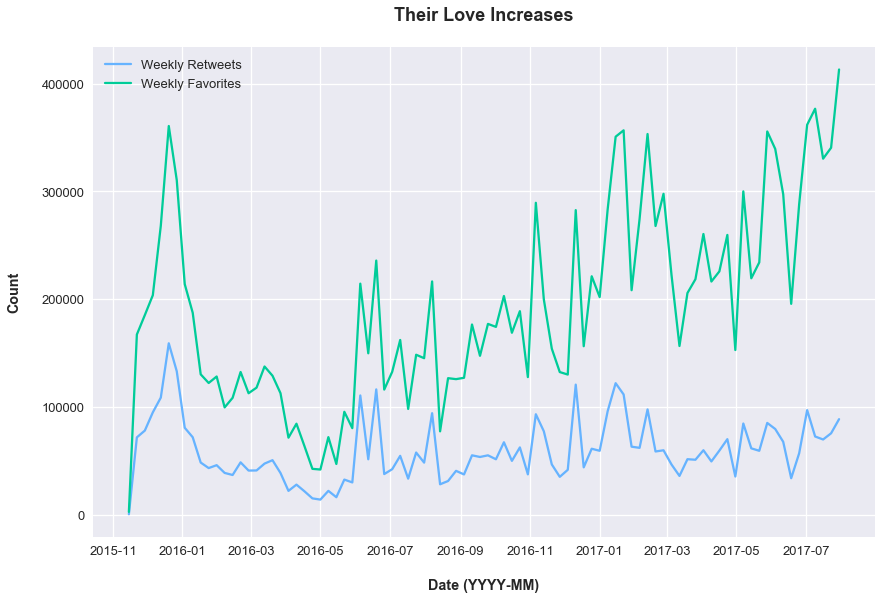

In [78]:
sns.set_context("talk")
plt.subplots(figsize=(14, 9))
plt.plot(weekly_retweet.timestamp, weekly_retweet.retweet_count, label="Weekly Retweets")
plt.plot(weekly_favorite.timestamp, weekly_favorite.favorite_count, label="Weekly Favorites")
plt.title('Their Love Increases\n', fontsize=18, weight='bold')
plt.xlabel('\nDate (YYYY-MM)', weight='bold')
plt.ylabel('Count\n', weight='bold')
plt.legend();
plt.savefig('love-increases.png')

### Dog Types

In [79]:
dog_counts = archive.groupby('dog_type')['tweet_id'].count()
dog_counts

dog_type
doggo       66
floofer      3
pupper     225
puppo       28
Name: tweet_id, dtype: int64

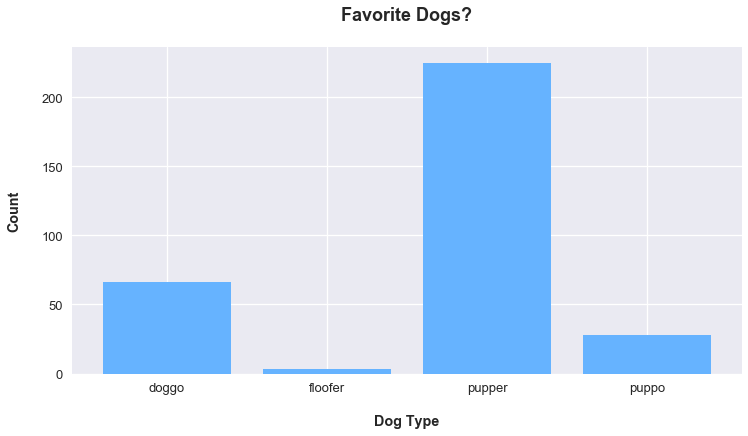

In [80]:
sns.set_context("talk")
plt.subplots(figsize=(12, 6))
plt.bar([1, 2, 3, 4], dog_counts, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Favorite Dogs?\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');
plt.savefig('favorite-dogs.png')

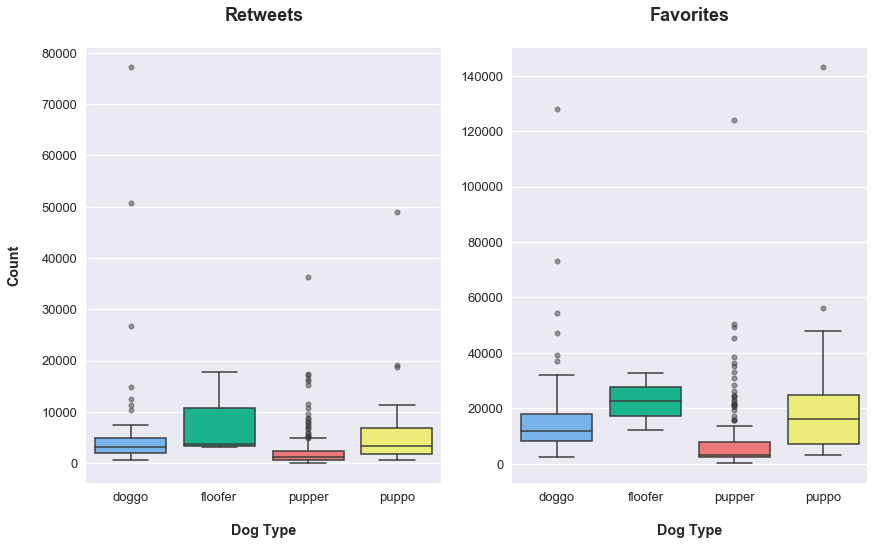

In [81]:
# Set outlier style
flierprops = dict(marker='o', alpha=0.5, markeredgewidth=1)

plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x=archive.dog_type, y=archive.retweet_count, flierprops=flierprops, linewidth=1.5)
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('Count\n', weight='bold');

plt.subplot(122)
sns.boxplot(x=archive.dog_type, y=archive.favorite_count, flierprops=flierprops, linewidth=1.5)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Type', weight='bold')
plt.ylabel('');
plt.savefig('boxplot.png')

Resources:
- [Changing outlier properties](https://stackoverflow.com/questions/23596575/plotting-with-a-transparent-marker-but-non-transparent-edge)

### Highest Rated

#### Retweet

In [85]:
# Get index
ind = archive.retweet_count.nlargest(5).index
# Get details
high_retweet = archive[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[ind]
high_retweet

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
769,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,77141.0,127911.0,13.0,10.0,doggo
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,60929.0,122715.0,13.0,10.0,NaN
804,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,50727.0,73148.0,13.0,10.0,doggo
306,822872901745569793,Here's a super supportive puppo participating ...,NaN,48967.0,143023.0,13.0,10.0,puppo
58,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,44476.0,105712.0,13.0,10.0,NaN


Two names, two not. All 13/10. Two doggo's, one puppo.

In [34]:
high_retweet.describe()

,retweet_count,favorite_count,rating_numerator,rating_denominator
count,5.000000,5.000000,5.0,5.0
mean,56448.000000,114501.800000,13.0,10.0
std,13041.315079,26683.887961,0.0,0.0
min,44476.000000,73148.000000,13.0,10.0
25%,48967.000000,105712.000000,13.0,10.0
50%,50727.000000,122715.000000,13.0,10.0
75%,60929.000000,127911.000000,13.0,10.0
max,77141.000000,143023.000000,13.0,10.0


Get image urls from predictions.

In [56]:
image = predictions[predictions.tweet_id == '744234799360020481']['jpg_url']
dups = image.duplicated()
image = image[~dups]
image.values[0]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [58]:
url_list = []
for tweet_id in high_retweet.tweet_id:
    image = predictions[predictions.tweet_id == tweet_id]['jpg_url']
    dups = image.duplicated()
    image = image[~dups]
    image_url = image.values[0]
    url_list.append(image_url)
    
url_list

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg']

In [144]:
Image(url= url_list[0], width=150, height=150)

In [75]:
print(high_retweet.text.loc[ind[0]])

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)


In [68]:
Image(url= url_list[1], width=250, height=250)

In [76]:
print(high_retweet.text.loc[ind[1]])

This is Stephan. He just wants to help. 13/10 such a good boy


In [69]:
Image(url= url_list[2], width=300, height=300)

In [77]:
print(high_retweet.text.loc[ind[2]])

Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)


In [78]:
Image(url= url_list[3], width=300, height=300)

In [79]:
print(high_retweet.text.loc[ind[3]])

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10


In [80]:
Image(url= url_list[4], width=300, height=300)

In [87]:
print(high_retweet.text.loc[ind[4]])

This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici)


Almost all of the highest retweets have videos.

#### Favorite

In [88]:
# Get index
ind = archive.favorite_count.nlargest(5).index
# Get details
high_favorite = archive[['tweet_id', 'text', 'name', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[ind]
high_favorite

,tweet_id,text,name,retweet_count,favorite_count,rating_numerator,rating_denominator,dog_type
306,822872901745569793,Here's a super supportive puppo participating ...,NaN,48967.0,143023.0,13.0,10.0,puppo
769,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,77141.0,127911.0,13.0,10.0,doggo
108,866450705531457537,This is Jamesy. He gives a kiss to every other...,Jamesy,36296.0,124101.0,13.0,10.0,pupper
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,60929.0,122715.0,13.0,10.0,NaN
58,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,44476.0,105712.0,13.0,10.0,NaN


In [89]:
high_favorite.tweet_id.isin(high_retweet.tweet_id)

306     True
769     True
108    False
397     True
58      True
Name: tweet_id, dtype: bool

Only one isn't shared

In [91]:
image = predictions[predictions.tweet_id == high_favorite.tweet_id.loc[108]]['jpg_url']
dups = image.duplicated()
image = image[~dups]
image_url = image.values[0]

In [92]:
Image(url= image_url, width=300, height=300)

In [96]:
print(high_favorite.text.loc[108])

This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender


### Rating to Retweet or Favorite

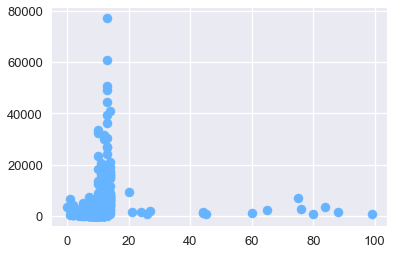

In [82]:
sns.set_context()
plt.scatter(archive.rating_numerator, archive.retweet_count);

Rating under 17 and log transform for retweets

In [83]:
ratings_df = archive.query('rating_numerator <= 17').copy()
ratings_df.retweet_count = ratings_df.retweet_count.transform(lambda x: np.log10(x))
ratings_df.favorite_count = ratings_df.favorite_count.transform(lambda x: np.log10(x))

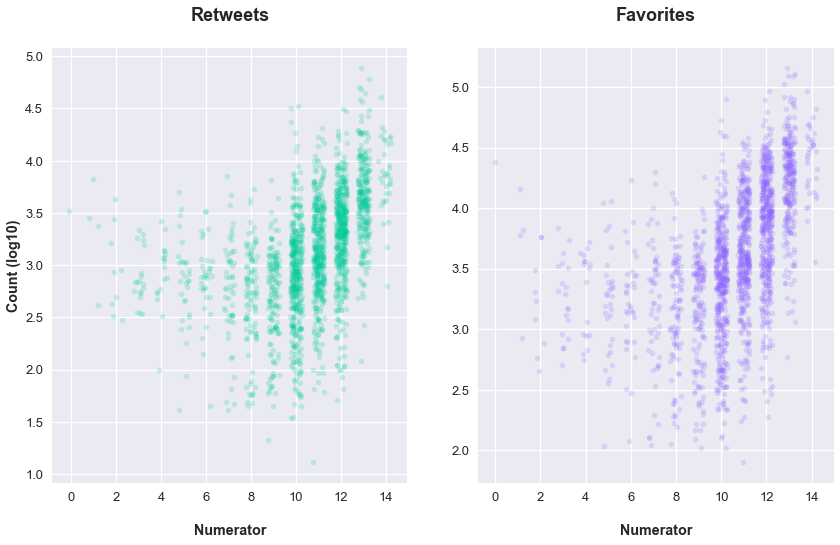

In [84]:
sns.set_context("talk")
plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.regplot(x='rating_numerator', 
            y='retweet_count', 
            data=ratings_df, 
            fit_reg=False, 
            x_jitter=0.25, 
            scatter_kws={'alpha': 0.2, 's': 30}, 
            color=my_palette[1])
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nNumerator', weight='bold')
plt.ylabel('Count (log10)', weight='bold');

plt.subplot(122)
sns.regplot(x='rating_numerator', 
            y='favorite_count', 
            data=ratings_df, 
            fit_reg=False, 
            x_jitter=0.25, 
            scatter_kws={'alpha': 0.2, 's': 30}, 
            color=my_palette[-2])
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nNumerator', weight='bold')
plt.ylabel('', weight='bold');
plt.savefig('ratings.png')

Resources:
- [Add jitter](https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot)

### Predictions

#### How Confident

In [156]:
confidence = predictions.groupby('prediction_order')['confidence']

In [150]:
confidence.mean()

prediction_order
1    0.594558
2    0.134585
3    0.060166
Name: confidence, dtype: float64

In [151]:
confidence.median()

prediction_order
1    0.587764
2    0.117397
3    0.049444
Name: confidence, dtype: float64

In [152]:
confidence.std()

prediction_order
1    0.272126
2    0.101053
3    0.050942
Name: confidence, dtype: float64

In [153]:
confidence.mean() - confidence.std()

prediction_order
1    0.322431
2    0.033532
3    0.009224
Name: confidence, dtype: float64

In [154]:
confidence.mean() + confidence.std()

prediction_order
1    0.866684
2    0.235638
3    0.111107
Name: confidence, dtype: float64

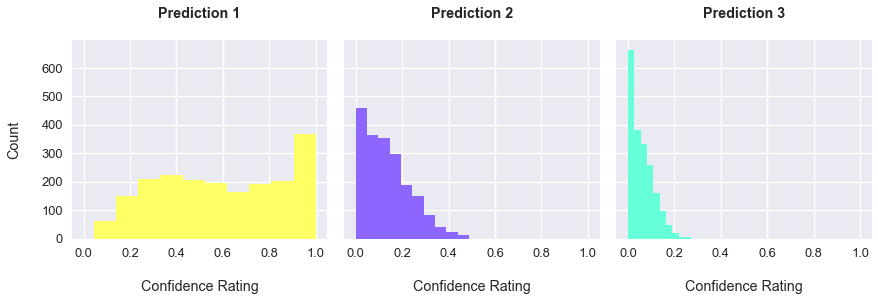

In [92]:
sns.FacetGrid(predictions, col="prediction_order", hue="prediction_order", palette=my_palette[3:], size=4)\
    .map(plt.hist, "confidence")\
    .set_titles("Prediction {col_name}\n", weight='bold', fontsize=14)\
    .set_axis_labels("\nConfidence Rating", "Count\n");
plt.savefig('confidence.png')

#### Samples

In [189]:
samples = predictions.query('prediction_order == 1').sample(5)
samples

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
5106,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,1,golden_retriever,0.573140,True
5763,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,1,Samoyed,0.281463,True
5112,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,1,Labrador_retriever,0.315163,True
1233,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,1,Pembroke,0.742320,True
753,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,1,dhole,0.350416,False


##### First

In [190]:
Image(url=samples.jpg_url.iloc[0], width=300, height=300)

In [191]:
predictions[predictions.tweet_id == samples.tweet_id.iloc[0]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
5106,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,1,golden_retriever,0.573140,True
5107,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,2,cocker_spaniel,0.111159,True
5108,829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,3,gibbon,0.094127,False


Spot on!

##### Second

In [192]:
Image(url=samples.jpg_url.iloc[1], width=300, height=300)

In [193]:
predictions[predictions.tweet_id == samples.tweet_id.iloc[1]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
5763,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,1,Samoyed,0.281463,True
5764,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,2,Angora,0.272066,False
5765,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,3,Persian_cat,0.114854,False


Nice! of a pup's behind!

##### Third

In [194]:
Image(url=samples.jpg_url.iloc[2], width=300, height=300)

In [195]:
predictions[predictions.tweet_id == samples.tweet_id.iloc[2]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
5112,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,1,Labrador_retriever,0.315163,True
5113,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,2,golden_retriever,0.153210,True
5114,829449946868879360,https://pbs.twimg.com/media/C4LMUf8WYAkWz4I.jpg,1,3,Pekinese,0.132791,True


Damn, even with a hat!

##### Fourth

In [196]:
Image(url=samples.jpg_url.iloc[3], width=300, height=300)

In [197]:
predictions[predictions.tweet_id == samples.tweet_id.iloc[3]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1233,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,1,Pembroke,0.742320,True
1234,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,2,Cardigan,0.084937,True
1235,674014384960745472,https://pbs.twimg.com/media/CVqUgTIUAAUA8Jr.jpg,1,3,Eskimo_dog,0.068321,True


Not just corgi, PEMBROKE corgi.

##### Fifth

In [198]:
Image(url=samples.jpg_url.iloc[4], width=300, height=300)

In [199]:
predictions[predictions.tweet_id == samples.tweet_id.iloc[4]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
753,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,1,dhole,0.350416,False
754,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,2,hare,0.236661,False
755,670733412878163972,https://pbs.twimg.com/media/CU7seitWwAArlVy.jpg,1,3,wood_rabbit,0.091133,False


Squirrel!!!

So not quite, but definitely in the right vicinity.